In [50]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse

Method definition

In [51]:
def print_metrics(predictions, X_test, y_test, labelNames, history, epochs):
    # Get the predicted labels (converted to 0 or 1)
    predicted_labels = (predictions > 0.5).astype(int)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))

    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Viewing training metrics in history
    plt.figure(figsize=(12, 6))

    # Precision
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
    plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Loading the dataset

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a CSV file
file_path = './SAheart.csv'
df = pd.read_csv(file_path)

# Encode in one-hot the categorical variable 'famhist'.
df = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Define characteristics (X) and target variable (y)
X = df.iloc[:, 1:-1]  # Exclude column 'row.names' y 'chd'
y = df['chd']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Analyze the size of the dataset

In [53]:
print("Size of X_train: ", X_train.shape[0])
print("Size of X_test: ", X_test.shape[0])

print("Total size of dataset: ", X_train.shape[0] + X_test.shape[0])


print("Training data percentage ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Test data percentage: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))


Size of X_train:  369
Size of X_test:  93
Total size of dataset:  462
Training data percentage  0.7987012987012987
Test data percentage:  0.2012987012987013


In [54]:
# We get the names of the classes from the database
labelNames = ['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
print("Total number of classes in the dataset: ", len(labelNames))

Total number of classes in the dataset:  11


In [55]:
# Count the number of different cases in a list
unique, counts = np.unique(y_train, return_counts=True)
print("Number of cases and their distribution in the training dataset: ", dict(zip(unique, counts)))

Number of cases and their distribution in the training dataset:  {0: 243, 1: 126}


In [56]:
# Standardise data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Neural Network Design

At this point, we have prepared the input data, so the requirements for the design of the NR will be:

 - Must have **64** neurons in the **input** layer.
 - It must have **1** neurons in the **output** layer.
 - We need a multicalse sorting activation function -> **sigmoid**.


In [57]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50


3/3 [==============================] - 3s 382ms/step - loss: 0.6751 - accuracy: 0.6233 - val_loss: 0.6596 - val_accuracy: 0.7312
Epoch 2/50
3/3 [==============================] - 0s 110ms/step - loss: 0.6668 - accuracy: 0.6558 - val_loss: 0.6516 - val_accuracy: 0.7419
Epoch 3/50
3/3 [==============================] - 0s 62ms/step - loss: 0.6590 - accuracy: 0.6938 - val_loss: 0.6439 - val_accuracy: 0.7527
Epoch 4/50
3/3 [==============================] - 0s 46ms/step - loss: 0.6514 - accuracy: 0.7209 - val_loss: 0.6362 - val_accuracy: 0.7742
Epoch 5/50
3/3 [==============================] - 0s 46ms/step - loss: 0.6438 - accuracy: 0.7534 - val_loss: 0.6286 - val_accuracy: 0.8172
Epoch 6/50
3/3 [==============================] - 0s 63ms/step - loss: 0.6364 - accuracy: 0.7832 - val_loss: 0.6214 - val_accuracy: 0.8172
Epoch 7/50
3/3 [==============================] - 0s 85ms/step - loss: 0.6292 - accuracy: 0.7886 - val_loss: 0.6142 - val_accuracy: 0.8387
Epoch 8/50
3/3 [====================

##### Making inference with the trained model

We use the trained model to precede an image.

In [59]:
# Making predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# You show the probability predictions
for i in range(len(predictions)):
    print(f"Predicted Label: {predicted_labels[i][0]}, Probability: {predictions[i][0]:.4f}")


3/3 [==============================] - 0s 10ms/step
Predicted Label: 0, Probability: 0.3737
Predicted Label: 1, Probability: 0.6308
Predicted Label: 1, Probability: 0.7922
Predicted Label: 0, Probability: 0.4207
Predicted Label: 0, Probability: 0.3851
Predicted Label: 0, Probability: 0.3487
Predicted Label: 0, Probability: 0.3275
Predicted Label: 1, Probability: 0.6814
Predicted Label: 0, Probability: 0.4122
Predicted Label: 1, Probability: 0.7387
Predicted Label: 1, Probability: 0.7773
Predicted Label: 1, Probability: 0.5641
Predicted Label: 0, Probability: 0.4082
Predicted Label: 0, Probability: 0.4040
Predicted Label: 0, Probability: 0.3625
Predicted Label: 0, Probability: 0.3170
Predicted Label: 0, Probability: 0.1222
Predicted Label: 1, Probability: 0.6865
Predicted Label: 0, Probability: 0.4731
Predicted Label: 1, Probability: 0.6819
Predicted Label: 1, Probability: 0.7928
Predicted Label: 1, Probability: 0.7238
Predicted Label: 0, Probability: 0.1157
Predicted Label: 1, Probabil

### Analysing the training

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.94      0.97      0.96        34

    accuracy                           0.97        93
   macro avg       0.96      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93

Confusion Matrix:
[[57  2]
 [ 1 33]]


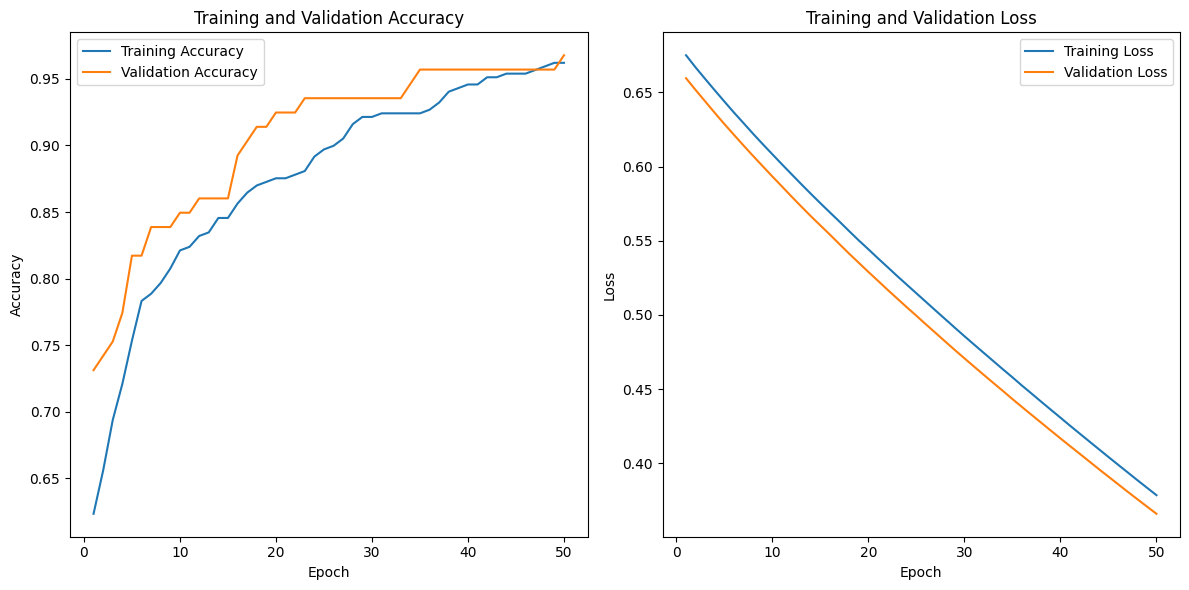

In [60]:
print_metrics(predictions, X_test, y_test, labelNames, H, 50)